In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,En la hacienda,1922
1,Unruhige Nacht,1958
2,Dissonance (II),2008
3,Self Intervention,2010
4,Ate,2008


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [55]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Honeymoon               11
Freedom                 11
The Three Musketeers    11
Othello                 11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [56]:
t = titles
t = t[(t.year // 10 * 10) == 1930]
t.year.value_counts()

1937    1224
1936    1169
1938    1163
1939    1111
1935    1073
1934    1001
1932     964
1933     918
1931     917
1930     848
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

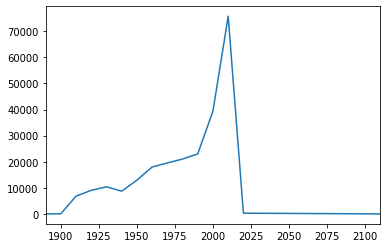

In [61]:
t = titles.copy()
t['decade'] = t.year // 10 * 10
t = t.decade.value_counts().sort_index()
t.plot()

### Plot the number of "Hamlet" films made each decade.

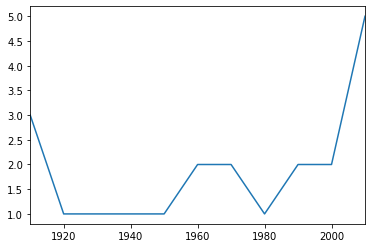

In [62]:
t = titles.copy()
t = t[t.title == 'Hamlet']
t['decade'] = t.year // 10 * 10
t = t.decade.value_counts().sort_index()
t.plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

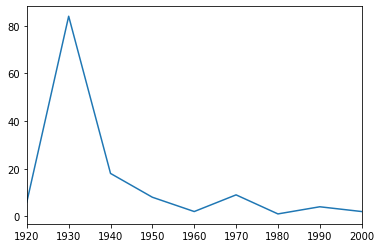

In [63]:
c = cast.copy()
c = c[c.character == 'Rustler']
c['decade'] = c.year // 10 * 10
c = c.decade.value_counts().sort_index()
c.plot()

### Plot the number of "Hamlet" characters each decade.

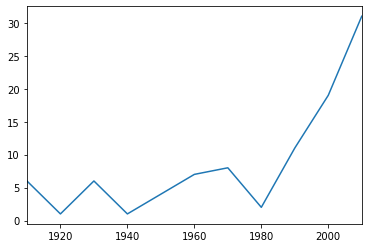

In [64]:
c = cast.copy()
c = c[c.character == 'Hamlet']
c['decade'] = c.year // 10 * 10
c = c.decade.value_counts().sort_index()
c.plot()

### What are the 11 most common character names in movie history?

In [47]:
c = cast
c.character.value_counts().head(11)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [53]:
c = cast
c = c[c.character == 'Herself']
c.name.value_counts().head(10)

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
Marilyn Monroe                6
Marta Berrocal                6
Mar?a Isabel (III) Mart?n     6
Joan Rivers                   6
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [54]:
c = cast
c = c[c.character == 'Himself']
c.name.value_counts().head(10)

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [71]:
c = cast
c[c.year==1945].name.value_counts().head(5)

Emmett Vogan       39
Sam (II) Harris    33
Harold Miller      29
Bess Flowers       29
Franklyn Farnum    27
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [72]:
c = cast
c[c.year==1985].name.value_counts().head(5)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Mohanlal         15
Aruna Irani      15
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

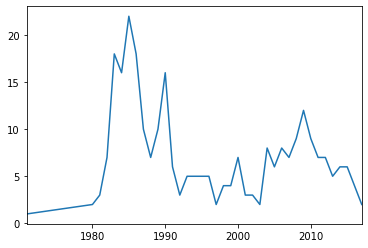

In [75]:
c = cast
c = c[c.name == 'Mammootty'].year.value_counts().sort_index()
c.plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [77]:
c = cast
c = c[c.character.str.startswith('Patron in')]
c.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Patron in booth                  2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [78]:
c = cast
c = c[c.character.str.startswith('Science')]
c.character.value_counts().head(10)

Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Promo Cadet      5
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science Club Member      5
Science                  4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

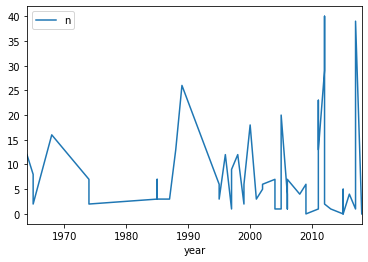

In [91]:
c = cast.copy()
c = c[c.name == 'Judi Dench'].sort_values(by='year')
c.n.fillna(0, inplace=True)
c.plot(x='year', y='n')

### Plot the n-values of Cary Grant's roles through his career.

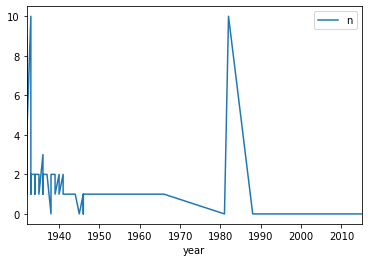

In [92]:
c = cast.copy()
c = c[c.name == 'Cary Grant'].sort_values(by='year')
c.n.fillna(0, inplace=True)
c.plot(x='year', y='n')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

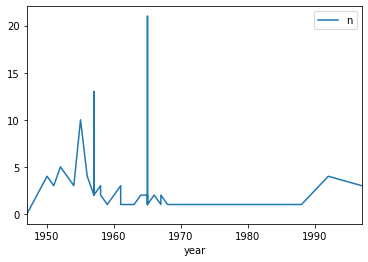

In [93]:
c = cast.copy()
c = c[c.name == 'Sidney Poitier'].sort_values(by='year')
c.n.fillna(0, inplace=True)
c.plot(x='year', y='n')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [109]:
c = cast
c = c[(c.n == 1) & (c.year // 10 * 10 == 1950)]
c.type.value_counts()

actor      6692
actress    3040
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [110]:
c = cast
c = c[(c.n == 2) & (c.year // 10 * 10 == 1950)]
c.type.value_counts()

actor      4640
actress    4635
Name: type, dtype: int64